# Power market study (South Australia, 4th Q of 2019 -  complete 2020)
## Data source AEMO

### Power Analyst: Konstantin Konakov




#### Importing all required libraries

In [5]:
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots
sns.set()

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Loading data as obtained from AEMO 

loading data from open source AEMO with 30 minutes interval (https://aemo.com.au/)

In [6]:

df = pd.read_csv('C:\___Konakov_work\EnergoZapas\South_Australia\AEMO_study_2021\PRICE_AND_DEMAND_201910_SA1.csv',
 index_col=['SETTLEMENTDATE'], parse_dates=['SETTLEMENTDATE'] )

df = df.append(pd.read_csv('C:\___Konakov_work\EnergoZapas\South_Australia\AEMO_study_2021\PRICE_AND_DEMAND_201911_SA1.csv',
                           header = 0,  index_col=['SETTLEMENTDATE'], parse_dates=['SETTLEMENTDATE'] ))
df = df.append(pd.read_csv('C:\___Konakov_work\EnergoZapas\South_Australia\AEMO_study_2021\PRICE_AND_DEMAND_201912_SA1.csv',
                 header = 0, index_col=['SETTLEMENTDATE'], parse_dates=['SETTLEMENTDATE'] ))
df = df.append(pd.read_csv('C:\___Konakov_work\EnergoZapas\South_Australia\AEMO_study_2021\PRICE_AND_DEMAND_202001_SA1.csv',
                 header = 0, index_col=['SETTLEMENTDATE'], parse_dates=['SETTLEMENTDATE'] ))

df = df.append(pd.read_csv('C:\___Konakov_work\EnergoZapas\South_Australia\AEMO_study_2021\PRICE_AND_DEMAND_202002_SA1.csv',
                 header = 0, index_col=['SETTLEMENTDATE'], parse_dates=['SETTLEMENTDATE']))
df = df.append(pd.read_csv('C:\___Konakov_work\EnergoZapas\South_Australia\AEMO_study_2021\PRICE_AND_DEMAND_202003_SA1.csv',
                 header = 0, index_col=['SETTLEMENTDATE'], parse_dates=['SETTLEMENTDATE']))
df = df.append(pd.read_csv('C:\___Konakov_work\EnergoZapas\South_Australia\AEMO_study_2021\PRICE_AND_DEMAND_202004_SA1.csv',
                 header = 0, index_col=['SETTLEMENTDATE'], parse_dates=['SETTLEMENTDATE']))
df = df.append(pd.read_csv('C:\___Konakov_work\EnergoZapas\South_Australia\AEMO_study_2021\PRICE_AND_DEMAND_202005_SA1.csv',
                 header = 0, index_col=['SETTLEMENTDATE'], parse_dates=['SETTLEMENTDATE']))
df = df.append(pd.read_csv('C:\___Konakov_work\EnergoZapas\South_Australia\AEMO_study_2021\PRICE_AND_DEMAND_202006_SA1.csv',
                 header = 0, index_col=['SETTLEMENTDATE'], parse_dates=['SETTLEMENTDATE']))
df = df.append(pd.read_csv('C:\___Konakov_work\EnergoZapas\South_Australia\AEMO_study_2021\PRICE_AND_DEMAND_202007_SA1.csv',
                 header = 0, index_col=['SETTLEMENTDATE'], parse_dates=['SETTLEMENTDATE']))
df = df.append(pd.read_csv('C:\___Konakov_work\EnergoZapas\South_Australia\AEMO_study_2021\PRICE_AND_DEMAND_202008_SA1.csv',
                 header = 0, index_col=['SETTLEMENTDATE'], parse_dates=['SETTLEMENTDATE']))
df = df.append(pd.read_csv('C:\___Konakov_work\EnergoZapas\South_Australia\AEMO_study_2021\PRICE_AND_DEMAND_202009_SA1.csv',
                 header = 0, index_col=['SETTLEMENTDATE'], parse_dates=['SETTLEMENTDATE']))
df = df.append(pd.read_csv('C:\___Konakov_work\EnergoZapas\South_Australia\AEMO_study_2021\PRICE_AND_DEMAND_202010_SA1.csv',
                 header = 0, index_col=['SETTLEMENTDATE'], parse_dates=['SETTLEMENTDATE']))
df = df.append(pd.read_csv('C:\___Konakov_work\EnergoZapas\South_Australia\AEMO_study_2021\PRICE_AND_DEMAND_202011_SA1.csv',
                 header = 0, index_col=['SETTLEMENTDATE'], parse_dates=['SETTLEMENTDATE']))
df = df.append(pd.read_csv('C:\___Konakov_work\EnergoZapas\South_Australia\AEMO_study_2021\PRICE_AND_DEMAND_202012_SA1.csv',
                 header = 0, index_col=['SETTLEMENTDATE'], parse_dates=['SETTLEMENTDATE']))



print('Data loaded OK')

Data loaded OK


#### Checking the volume and types of loaded data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21984 entries, 2019-10-01 00:30:00 to 2021-01-01 00:00:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   REGION       21984 non-null  object 
 1   TOTALDEMAND  21984 non-null  float64
 2   RRP          21984 non-null  float64
 3   PERIODTYPE   21984 non-null  object 
dtypes: float64(2), object(2)
memory usage: 858.8+ KB


* we loaded data for 15 months: from 01-Oct 2019 till 01-Jan 2021
* there are no missing values, all 21984 readings are there for every field
* minimal memory used (less than 1 MB) so optimization of data types are not required

In [8]:
df # let us see the head and tail of data frame

,REGION,TOTALDEMAND,RRP,PERIODTYPE
SETTLEMENTDATE,,,,
2019-10-01 00:30:00,SA1,1390.99,125.19,TRADE
2019-10-01 01:00:00,SA1,1332.87,94.26,TRADE
2019-10-01 01:30:00,SA1,1273.33,86.37,TRADE
2019-10-01 02:00:00,SA1,1212.97,82.75,TRADE
2019-10-01 02:30:00,SA1,1172.38,75.38,TRADE
...,...,...,...,...
2020-12-31 22:00:00,SA1,1161.41,33.77,TRADE
2020-12-31 22:30:00,SA1,1129.06,45.56,TRADE
2020-12-31 23:00:00,SA1,1122.64,36.47,TRADE


* RRP is the price we are after
* Region and Period type do not carry meaningfull info at this stage and can be dropped after we check that they are all the same
* Total demand may be usefull for understading of general 'market temperature', let us keep these values 

In [10]:
df['REGION'].unique() # checking uniqie values in REGION field

array(['SA1'], dtype=object)

* all data are from the same region SA

In [18]:
df['PERIODTYPE'].unique() # checking uniqie values in PERIODTYPE field

array(['TRADE'], dtype=object)

* all data are from the same source - Trade platform for electric power

#### Let us check if our data are monotonic

In [3]:
if df.index.is_monotonic: # monotonic check
    print('Data are monotonic')
else:
    print('Not monotonic, sorting')
    df.sort_index(inplace=True)
    print(df.info())

Data are monotonic


* Data are loaded in accordance with the time flow

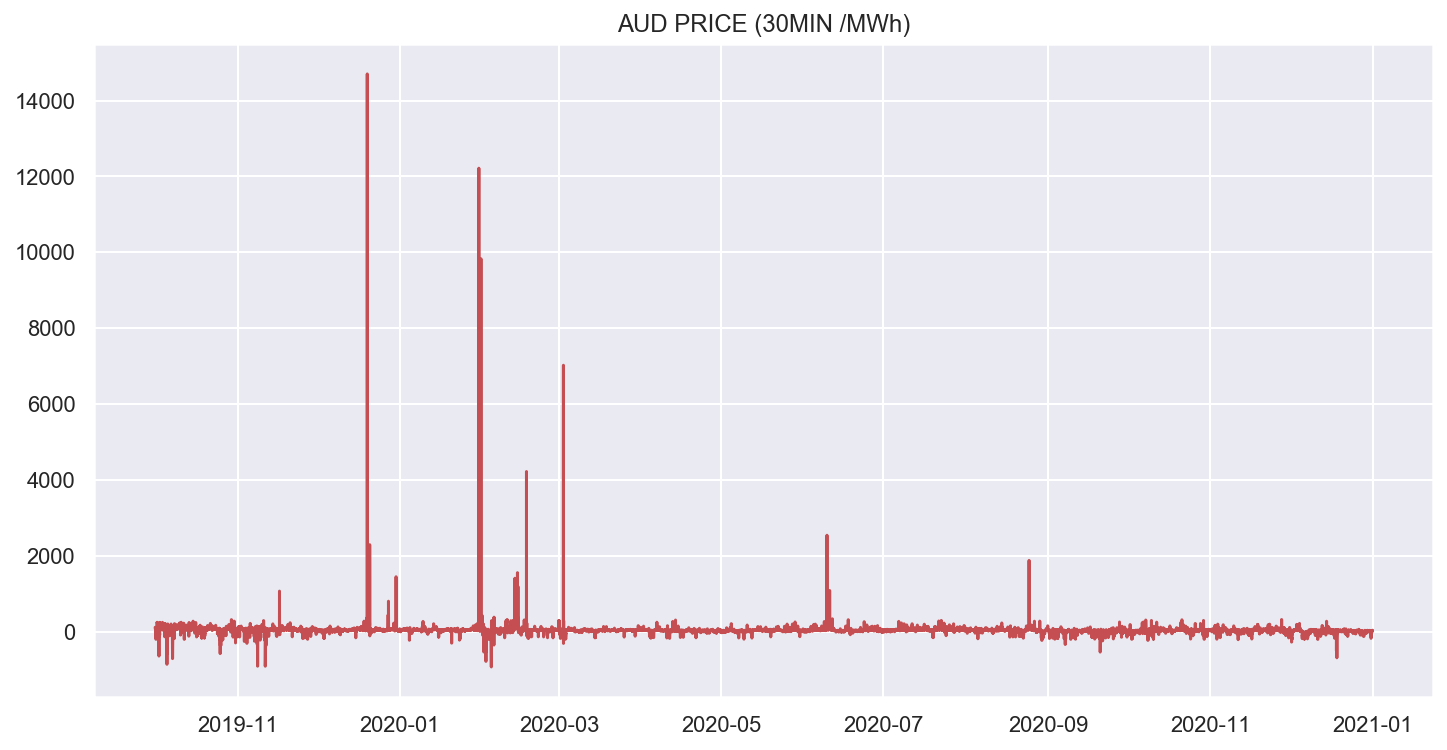

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(df.RRP,'r')
plt.title('AUD PRICE (30MIN /MWh)')
plt.grid(True)
plt.show()

* we can see huge price spikes both in positive and negative direction
* more spikes during Australian summer seaon - there was an extremelly hot summer


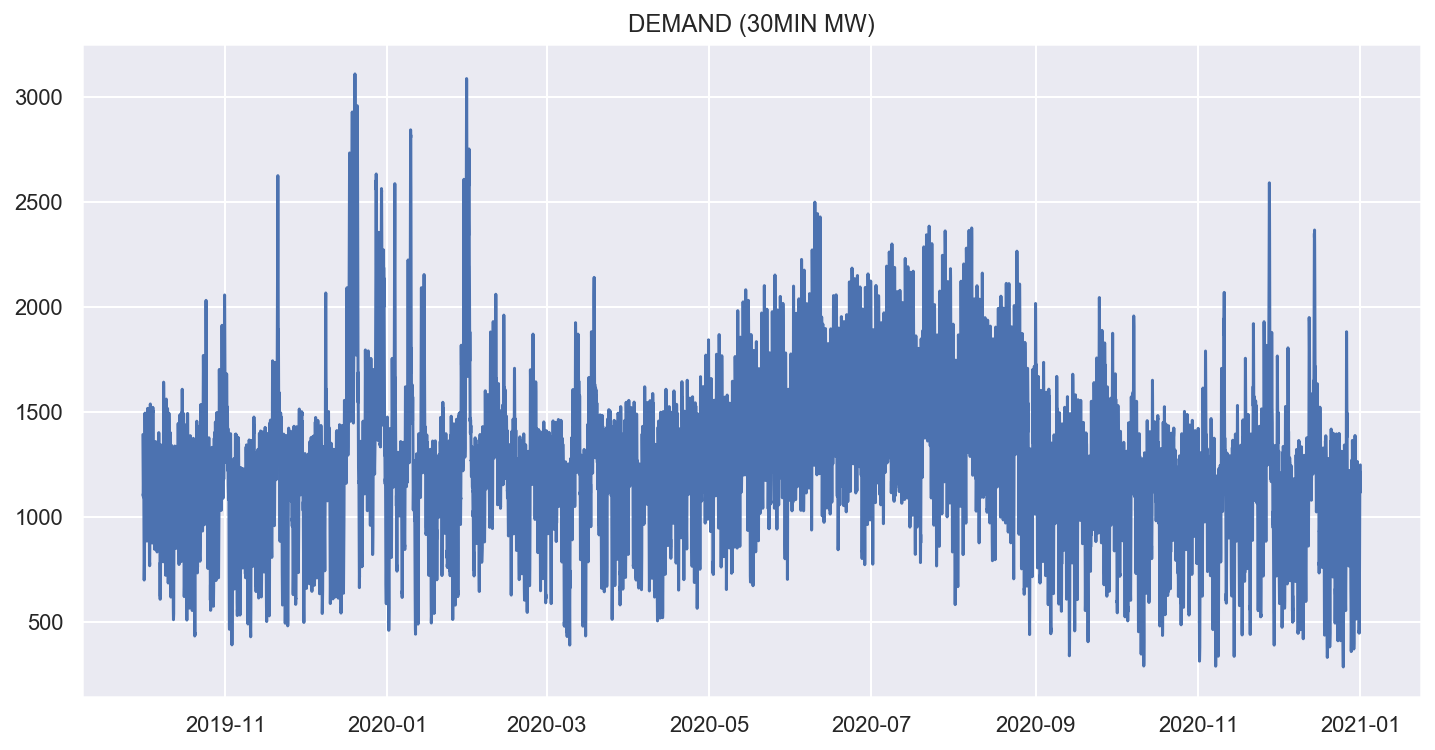

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df.TOTALDEMAND)
plt.title('DEMAND (30MIN MW)')
plt.grid(True)
plt.show()

* air conditioning has caused spikes in demand too 

#### Let us zoom into the last two weeks of the year 

Readings go with 30 min interval, so we have 48 readings per day, that makes per 10 days:

In [34]:
zoomlmt = 48*10
print(zoomlmt, ' readings per decade')

480  readings per decade


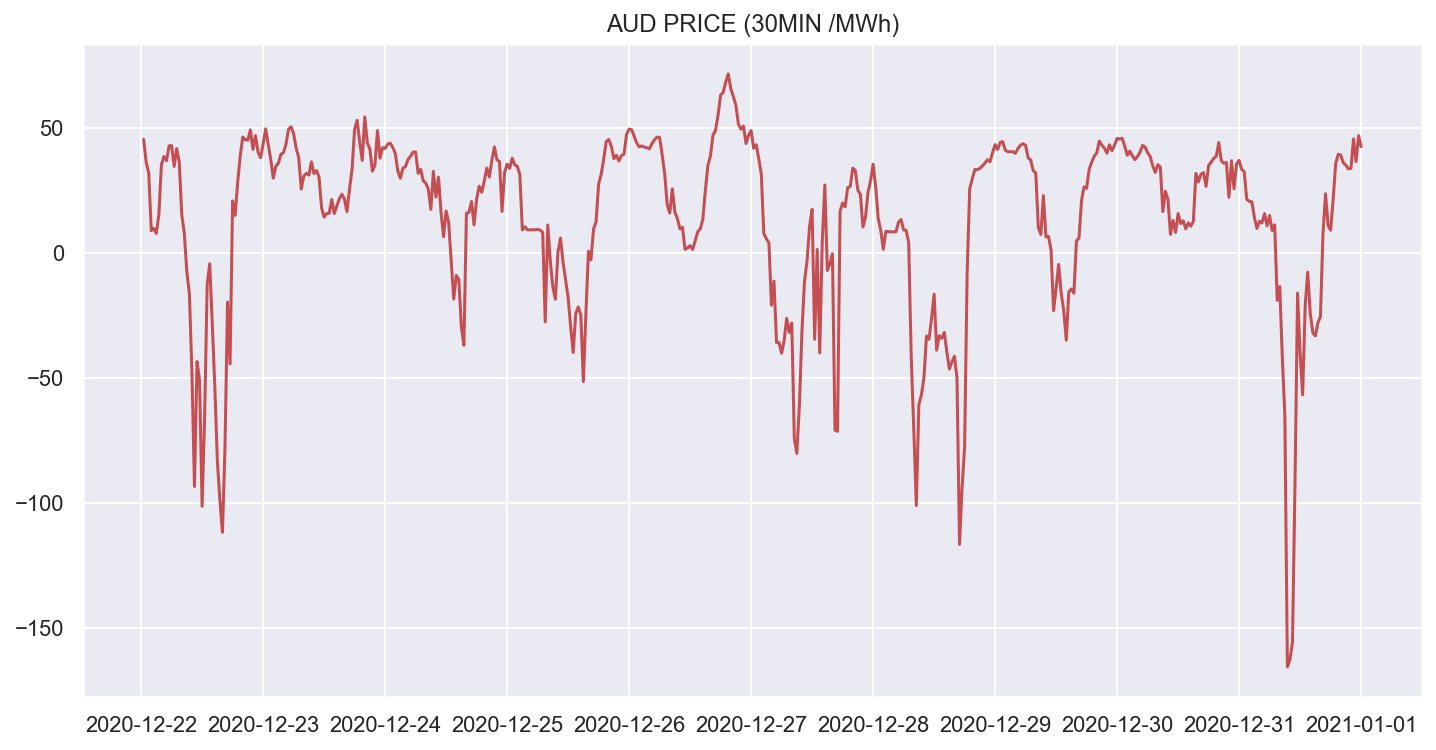

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(df.RRP[-zoomlmt:],'r')
plt.title('AUD PRICE (30MIN /MWh)')
plt.grid(True)
plt.show()

* we can see peridical time series with spikes of negative prices
* it can be very interesting to buy power at negative price to fill in power storage

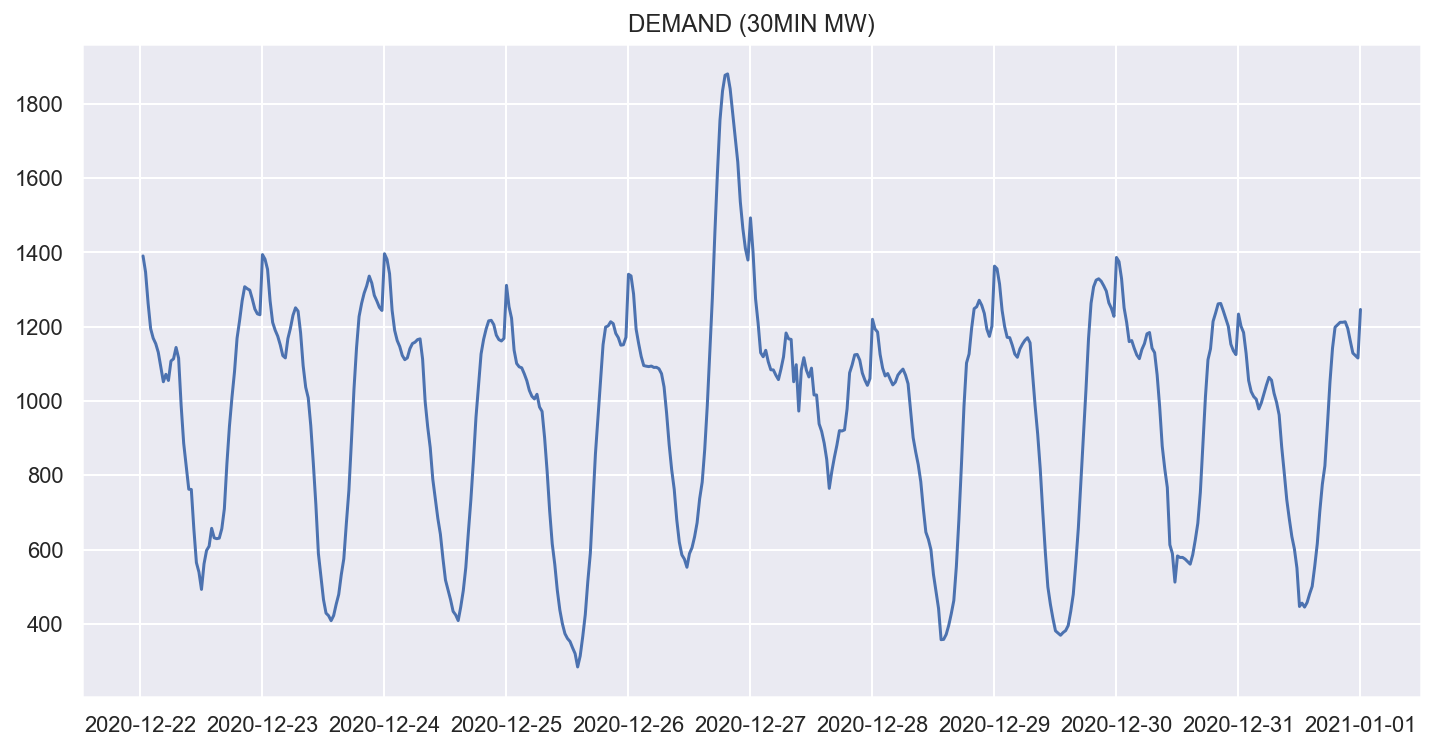

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(df.TOTALDEMAND[-zoomlmt:])
plt.title('DEMAND (30MIN MW)')
plt.grid(True)
plt.show()